In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nest

from scripts import visualizations, initializations, optimization, experiments

In [8]:
my_file = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/experiment3_unfiltered_processed.npy')
my_boolean = False
for i in range(206):
    counter = 0
    clone = np.copy(my_file[i])
    while clone[0] == 0:
        clone = np.delete(clone, 0)
    while clone[-1] == 0:
        clone = np.delete(clone, -1)
    for j in range(17988):
        try:
            if clone[i] == 0:
                counter += 1
            elif clone[i] != 0 and counter != 2:
                counter = 0
            elif clone[i] != 0 and counter == 2:
                counter = 0
                my_boolean = True
        except:
            pass
print(my_boolean)


In [ ]:
nest.rng_seed = 1
np.random.seed(1)

In [ ]:
default_weights = np.load('/hpc/mzhu843/modelling/nest/DATA/matrices/initial_matrix.npy')


Dec 07 16:33:40 correlation_detector [Info]: 
    Default for delta_tau changed from 0.5 to 5 ms

Dec 07 16:33:40 correlomatrix_detector [Info]: 
    Default for delta_tau changed from 0.5 to 5 ms

Dec 07 16:33:40 correlospinmatrix_detector [Info]: 
    Default for delta_tau changed from 0.1 to 1 ms

Dec 07 16:33:40 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 1 ms.

Dec 07 16:33:40 NodeManager::prepare_nodes [Info]: 
    Preparing 280 nodes for simulation.

Dec 07 16:33:40 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 280
    Simulation time (ms): 17988
    Number of OpenMP threads: 1
    Not using MPI

Dec 07 16:33:42 SimulationManager::run [Info]: 
    Simulation finished.


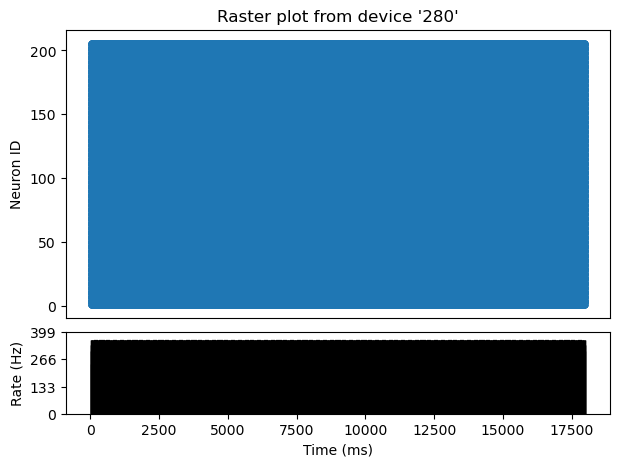

In [ ]:
results, spike_recorder = experiments.run_s1(default_weights, G_e = 40, G_i = -20)
nest.raster_plot.from_device(spike_recorder)